# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

## Exploratory Data Analysis

<hr>

2,985,217 Observations in properties information

58 Features


In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
base_dir = '../input/'

## 2016 Properties

Information about the properties.

In [3]:
properties_2016 = pd.read_csv(os.path.join(base_dir, 'properties_2016.csv'))
properties_2016.head()  

# Convert property float.64 data to float.32 to save memory
for c, dtype in zip(properties_2016.columns, properties_2016.dtypes):
    if dtype == np.float64:
        properties_2016[c] = properties_2016[c].astype(np.float32)
properties_2016.dtypes

/home/bss/opt/anaconda3/envs/zillow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


parcelid                          int64
airconditioningtypeid           float32
architecturalstyletypeid        float32
basementsqft                    float32
bathroomcnt                     float32
bedroomcnt                      float32
buildingclasstypeid             float32
buildingqualitytypeid           float32
calculatedbathnbr               float32
decktypeid                      float32
finishedfloor1squarefeet        float32
calculatedfinishedsquarefeet    float32
finishedsquarefeet12            float32
finishedsquarefeet13            float32
finishedsquarefeet15            float32
finishedsquarefeet50            float32
finishedsquarefeet6             float32
fips                            float32
fireplacecnt                    float32
fullbathcnt                     float32
garagecarcnt                    float32
garagetotalsqft                 float32
hashottuborspa                   object
heatingorsystemtypeid           float32
latitude                        float32


### 2016 Properties Features

58 total features

In [4]:
for i in properties_2016.columns.values.tolist(): print(i)
print('\n Total Features: ' + str(len(properties_2016.columns.values.tolist())))

# observations
print(str(len(properties_2016.index)) + ' observations in dataset')

parcelid
airconditioningtypeid
architecturalstyletypeid
basementsqft
bathroomcnt
bedroomcnt
buildingclasstypeid
buildingqualitytypeid
calculatedbathnbr
decktypeid
finishedfloor1squarefeet
calculatedfinishedsquarefeet
finishedsquarefeet12
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
finishedsquarefeet6
fips
fireplacecnt
fullbathcnt
garagecarcnt
garagetotalsqft
hashottuborspa
heatingorsystemtypeid
latitude
longitude
lotsizesquarefeet
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
propertycountylandusecode
propertylandusetypeid
propertyzoningdesc
rawcensustractandblock
regionidcity
regionidcounty
regionidneighborhood
regionidzip
roomcnt
storytypeid
threequarterbathnbr
typeconstructiontypeid
unitcnt
yardbuildingsqft17
yardbuildingsqft26
yearbuilt
numberofstories
fireplaceflag
structuretaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
landtaxvaluedollarcnt
taxamount
taxdelinquencyflag
taxdelinquencyyear
censustractandblock

 Total Features: 58
2985217 observatio

In [5]:
# percentage of missing values to total observations
missing_value_dist = properties_2016.isnull().sum()/2985217
missing_value_dist = missing_value_dist*100
missing_value_dist.sort_values()

parcelid                         0.000000
fips                             0.383121
propertylandusetypeid            0.383121
rawcensustractandblock           0.383121
regionidcounty                   0.383121
longitude                        0.383121
latitude                         0.383121
assessmentyear                   0.383188
bedroomcnt                       0.383557
bathroomcnt                      0.383959
roomcnt                          0.384394
propertycountylandusecode        0.411260
regionidzip                      0.468308
taxamount                        1.046825
taxvaluedollarcnt                1.425357
structuretaxvaluedollarcnt       1.841809
calculatedfinishedsquarefeet     1.861339
yearbuilt                        2.007492
regionidcity                     2.105207
landtaxvaluedollarcnt            2.268947
censustractandblock              2.516601
fullbathcnt                      4.318346
calculatedbathnbr                4.318346
finishedsquarefeet12             9

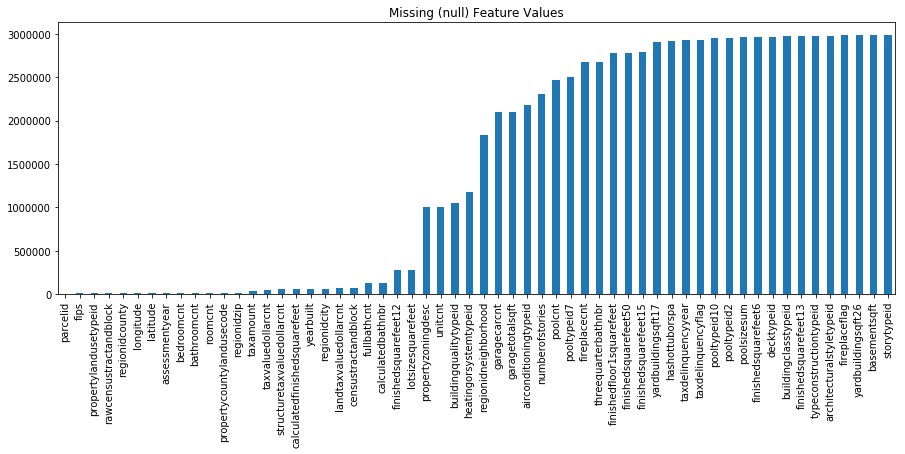

In [6]:
# missing vals
missing_values = properties_2016.isnull().sum().sort_values()  #print(missing_values)
# plot values
missing_values.plot.bar(figsize=(15, 5),rot=90, title='Missing (null) Feature Values')

In [ ]:
properties_2016['taxdelinquencyflag'].unique()

In [ ]:
tax_del = pd.get_dummies(properties_2016['taxdelinquencyflag'])

In [ ]:
np.unique(tax_del.as_matrix(), return_counts=True)

## Feature Exploring

A glipse into the provided features

In [11]:
# parcel id -- remove 
# Each ID is unique
2985217 == len(properties_2016['parcelid'].unique())

True

### Property Zoning Description (DROP)
Description:  Description of the allowed land uses (zoning) for that property

Unique Types: 5639

Percent Missing: 33.7%

In [16]:
len(properties_2016['propertyzoningdesc'].unique())

5639

### Property Land Use Code (DROP)
Description:  County land use code i.e. it's zoning at the county level

Unique Types: 241

Percent Missing: 0.4%

Reason: Too many unqiue categories, w/o mapping it's risky to combine.

In [24]:
print(len(properties_2016['propertycountylandusecode'].unique()))
#properties_2016['propertycountylandusecode'].head(100)

241


### Fireplace Count

Percent Missing: 89.5%

Min: 1 -- Max: 9 -- Median: 1

Reason: too many missing values to implant median of 1

In [29]:
properties_2016['fireplacecnt'].dtype

dtype('float32')

### Fireplace Flag

Missing: 99% 

### AirConditioningTypeID / air_conditioning_type (keep)

Fill in missing values with 0, one-hot encode 

AirConditioningTypeID	AirConditioningDesc
1	Central
3	Evaporative Cooler
5	None
9	Refrigeration
11	Wall Unit
12	Window Unit
13	Yes

In [ ]:
# airconditioningtypeid ()
# 72.815410 % missing values 
#properties_2016['air_conditioning_type'].unique()
print(properties_2016.air_conditioning_type.value_counts())

In [ ]:
test = pd.get_dummies(properties_2016)

### Lotsizesq

In [47]:
float_formatter = lambda x: "%.2f" % x

print('Lot Size (sqft) Max: ' + float_formatter(properties_2016['lotsizesquarefeet'].max()))
print('Lot Size (sqft) Min: ' + float_formatter(properties_2016['lotsizesquarefeet'].min()))
print('Lot Size (sqft) Median: ' + float_formatter(properties_2016['lotsizesquarefeet'].median()))

Lot Size (sqft) Max: 328263808.00
Lot Size (sqft) Min: 100.00
Lot Size (sqft) Median: 7000.00


### Year Built Feature Engineering

Missing: 2%

Unique: 169

In [49]:
yb = properties_2016['yearbuilt']
print('Year Built Max: ' + float_formatter(yb.max()))
print('Year Built Min: ' + float_formatter(yb.min()))
print('Year Built Median: ' + float_formatter(yb.median()))
print(len(yb.unique()))

Year Built Max: 2015.00
Year Built Min: 1801.00
Year Built Median: 1963.00
169


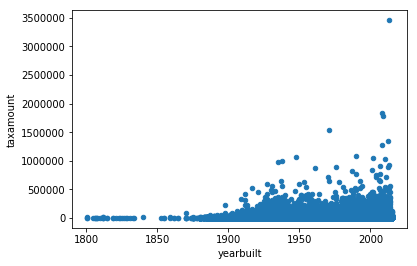

In [55]:
properties_2016.plot.scatter(x='yearbuilt', y='taxamount')

### String Features

In [ ]:
# fireplaceflag
# one hot encode
print(properties_2016['fireplaceflag'].unique())
fireplaces = pd.get_dummies(properties_2016['fireplaceflag'])
fireplaces[1][:].unique()

<hr>

### Training 2016 

* Parcel ID

* Log Error

* Transaction Date

Total: 90,275 observations x 3 columns

Information about the transactions

In [31]:
train_2016 = pd.read_csv(os.path.join(base_dir, 'train_2016_v2.csv'))
train_2016.head() 

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


### Transaction date

Missing: 0

Unique: 352/90,275

In [38]:
print('Unique: ', len(train_2016['transactiondate'].unique()))
train_2016['transactiondate'].dtype

Unique:  352


dtype('O')

In [ ]:
td_mn = train_2016['transactiondate'].

## Submission File

Description: predict 6 time points for all properties: October 2016 (201610), November 2016 (201611), December 2016 (201612), October 2017 (201710), November 2017 (201711), and December 2017 (201712)

Rows: 2985217 

Columns: ['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712']

Note: Not currently adjusting prediction for each month

In [44]:
submission = pd.read_csv('../submissions/sample_submission.csv')

In [46]:
submission.columns

Index(['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712'], dtype='object')

In [ ]:
'''
Load datasets -- HOLD OFF
'''
def load_data():
    # Properties '16 data
    # better headers -- thanks (https://www.kaggle.com/nikitabu/zillow-eda-opportunities-for-feature-engineering)
    names = ['parcelid', 'air_conditioning_type', 'architectural_style', 
             'area_basement', 'num_bathroom', 'num_bedroom', 'framing_type',
             'building_quality', 'num_bathroom_calc', 'deck_type',
             'area_firstfloor_finished', 'area_total_calc',
             'area_living_finished', 'perimeter_living',
             'area_total', 'area_firstfloor_unfinished',
             'area_base', 'fips', 'num_fireplace', 'num_fullbath',
             'num_garagecar', 'area_garage', 'hashottuborspa',
             'heating_type', 'latitude', 'longitude',
             'area_lot', 'num_pool', 'area_pools', 'pooltypeid10',
             'pooltypeid2', 'pooltypeid7', 'property_land_use_code',
             'property_land_use_type', 'property_zoning_desc',
             'census_raw_tract_block', 'region_city', 'region_county',
             'region_neighborhood', 'region_zipcode', 'num_room', 'story_type',
             'num_34_bath', 'material_type', 'num_unit',
             'area_patio', 'area_shed', 'build_year',
             'num_stories', 'flag_fireplace', 'tax_assessed_structure_value',
             'tax_assessed_parcel_value', 'tax_assessment_year', 'tax_assessed_land_alue',
             'tax_property', 'tax_delinquency_flag', 'tax_delinquency_year',
             'census_tract_block']
    properties_2016 = pd.read_csv(os.path.join(base_dir, 'properties_2016.csv'), names = names, header = 0)

    # Training data
    train_2016 = pd.read_csv(os.path.join(base_dir, 'train_2016_v2.csv'))
    
    # Sample data
    sample = pd.read_csv('../submissions/sample_submission.csv')
    
    # Return data
    return properties_2016, train_2016, sample

properties_2016, train, sample = load_data()

'''
Data Pre-processing
'''
def data_preprocessing(properties_2016):
    # Data Types 
    # float64 vals to float32
    for c, dtype in zip(properties_2016.columns, properties_2016.dtypes):
        if dtype == np.float64:
            properties_2016[c] = properties_2016[c].astype(np.float32)
            
    # return
    return properties_2016

properties_2016 = data_preprocessing(properties_2016)